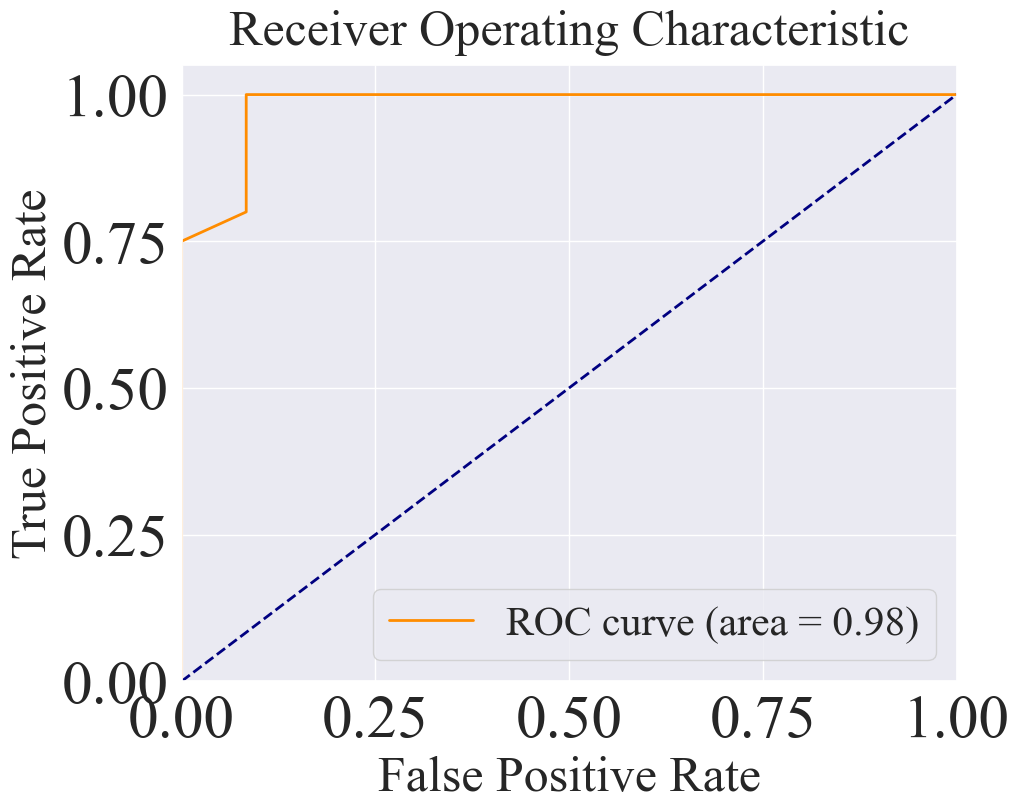

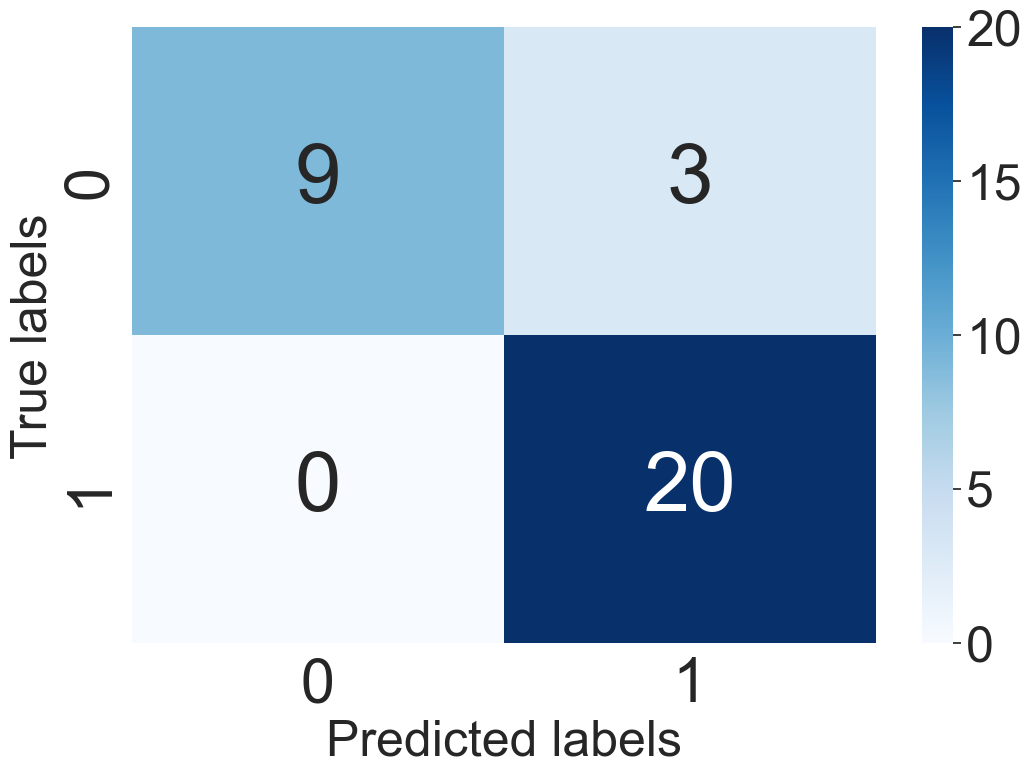

AUC Score: 0.98125
Sensitivity: 1.0
Accuracy: 0.90625
Confusion Matrix:
[[ 9  3]
 [ 0 20]]
Specificity: 0.75
Precision: 0.8695652173913043


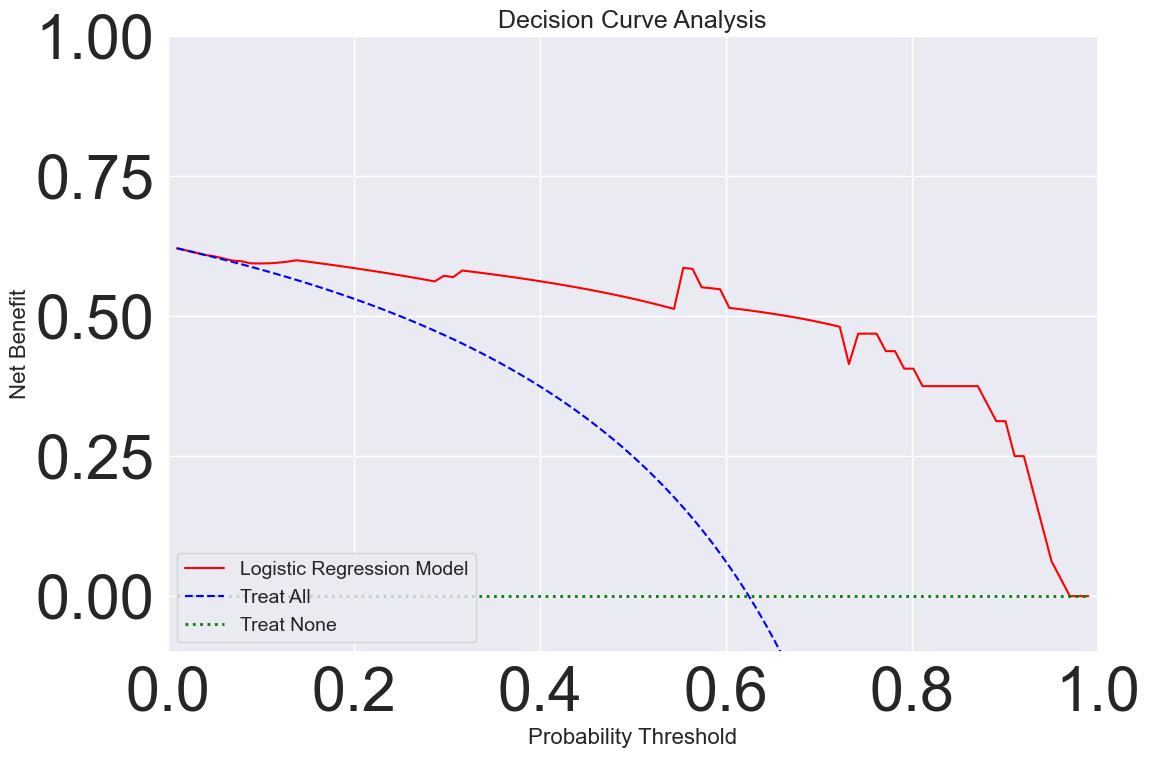

In [18]:
#随机森林
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/train_dataset.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/test_dataset.csv')
# 2. 分离特征和标签
X_train = train_data.iloc[:, 2:] 
y_train = train_data['label']
X_test = test_data.iloc[:, 2:] 
y_test = test_data['label']

# 3. 初始化并训练随机森林模型
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('All feature-Random forest', fontsize=36, y=1.02)  # 调整标题位置
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='Logistic Regression Model', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()


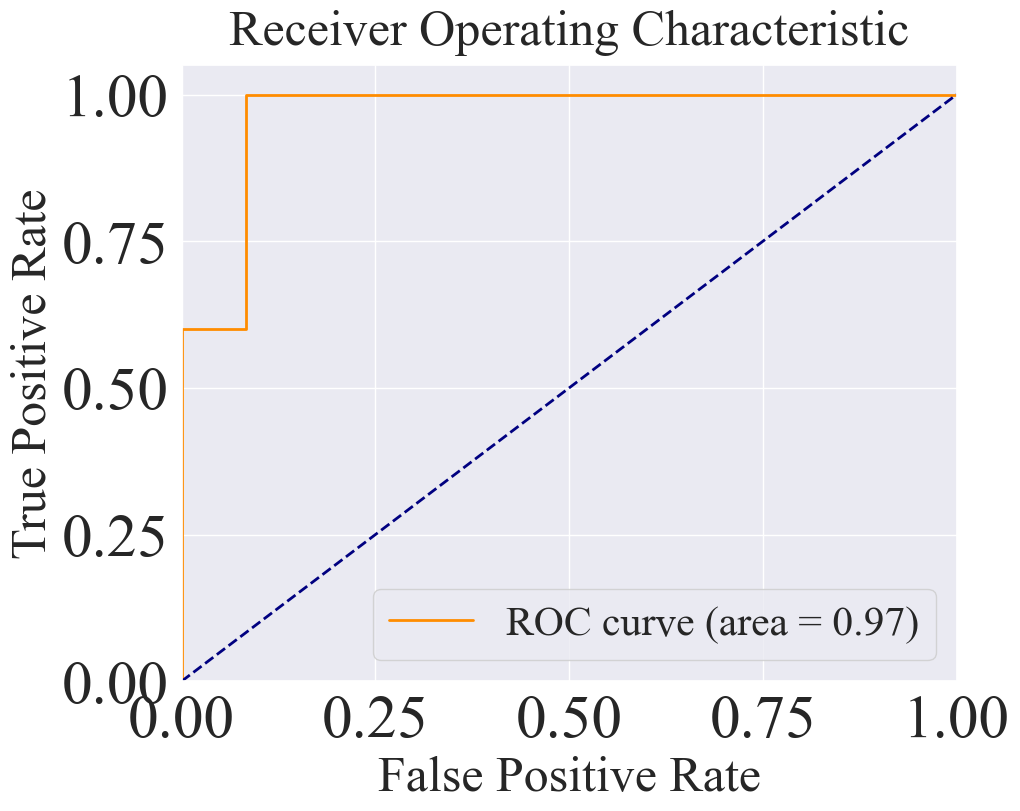

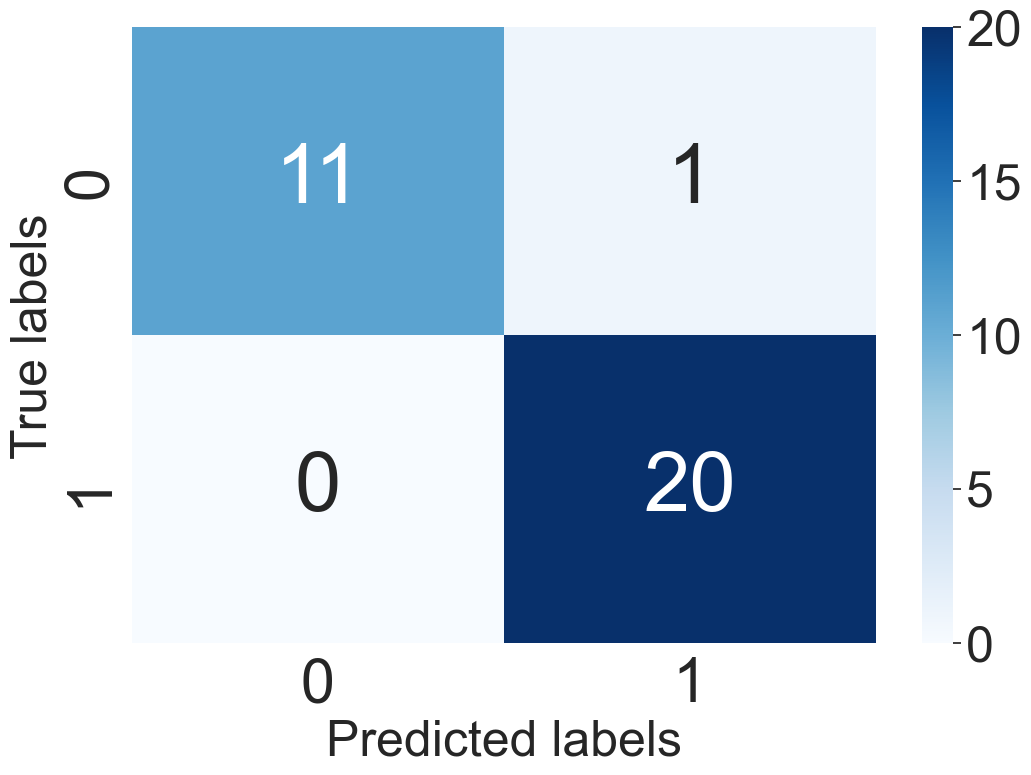

AUC Score: 0.9666666666666667
Sensitivity: 1.0
Accuracy: 0.96875
Confusion Matrix:
[[11  1]
 [ 0 20]]
Specificity: 0.9166666666666666
Precision: 0.9523809523809523


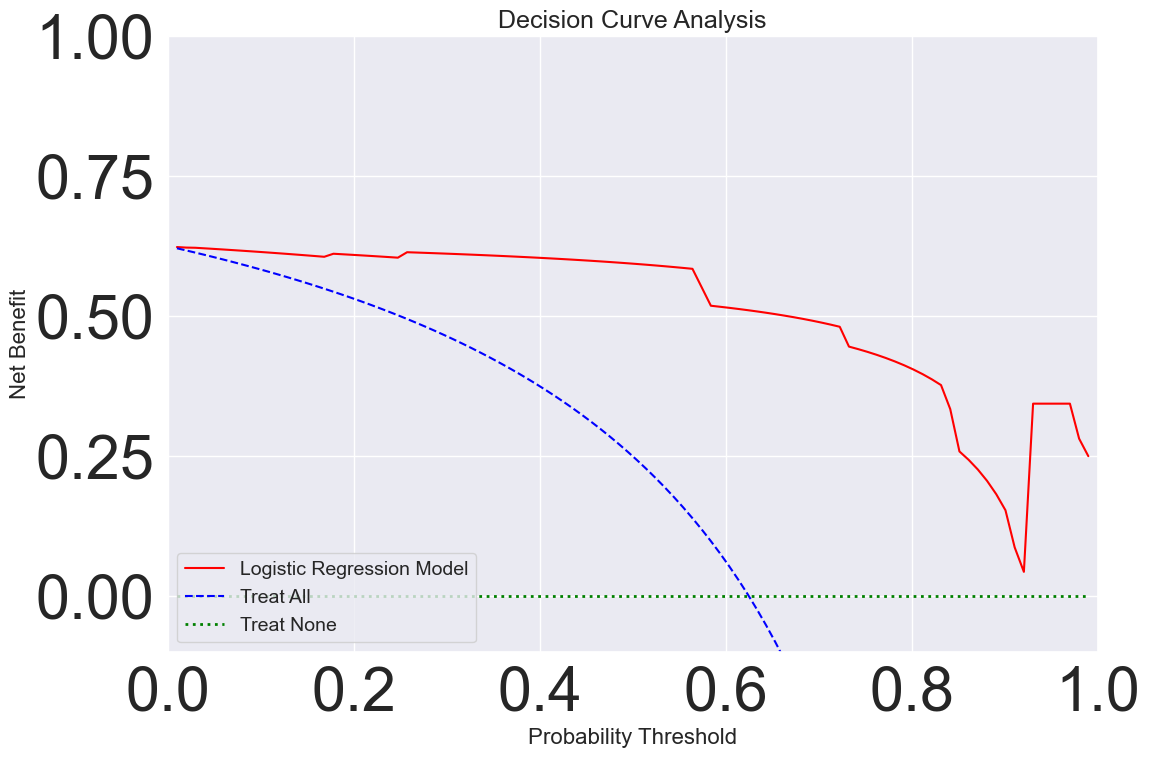

In [13]:
#xgboost
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/train_dataset.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/test_dataset.csv')
# 2. 分离特征和标签
x_train = train_data.iloc[:, 2:] 
y_train = train_data['label']
x_test = test_data.iloc[:, 2:] 
y_test = test_data['label']

clf_XGB = XGBClassifier(use_label_encoder=False)
clf_XGB.fit(x_train, y_train)
# 计算预测概率
y_pred_proba = clf_XGB.predict_proba(x_test)[:, 1]


# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# 计算模型评估指标
y_pred = clf_XGB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('All feature-Xgboost', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 输出模型评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
# print("AUC Score:", auc_score)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='Logistic Regression Model', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()



C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


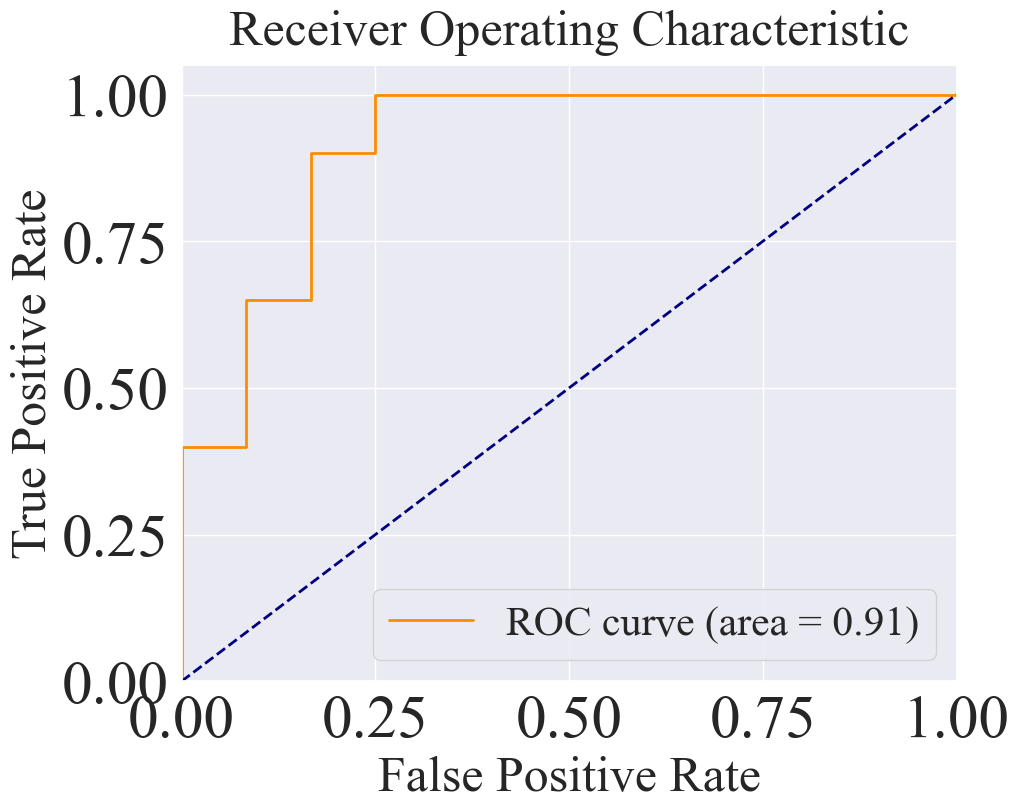

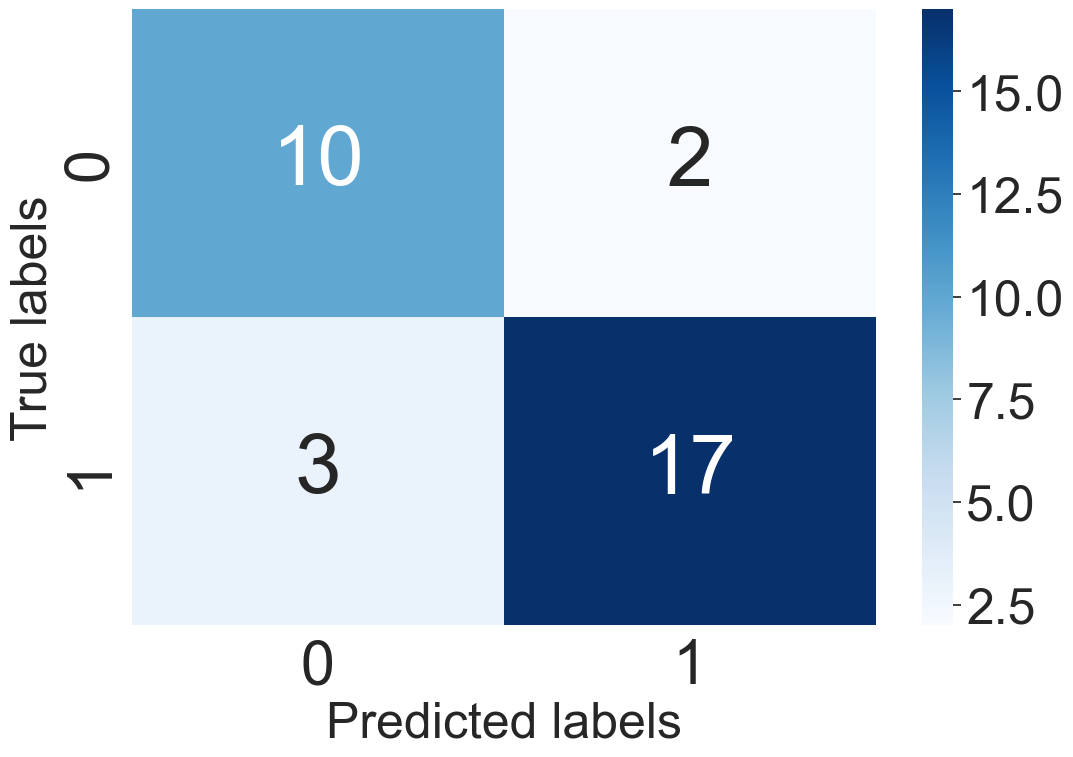

AUC Score: 0.9125
Sensitivity: 0.85
Accuracy: 0.84375
Confusion Matrix:
[[10  2]
 [ 3 17]]
Specificity: 0.8333333333333334
Precision: 0.8947368421052632


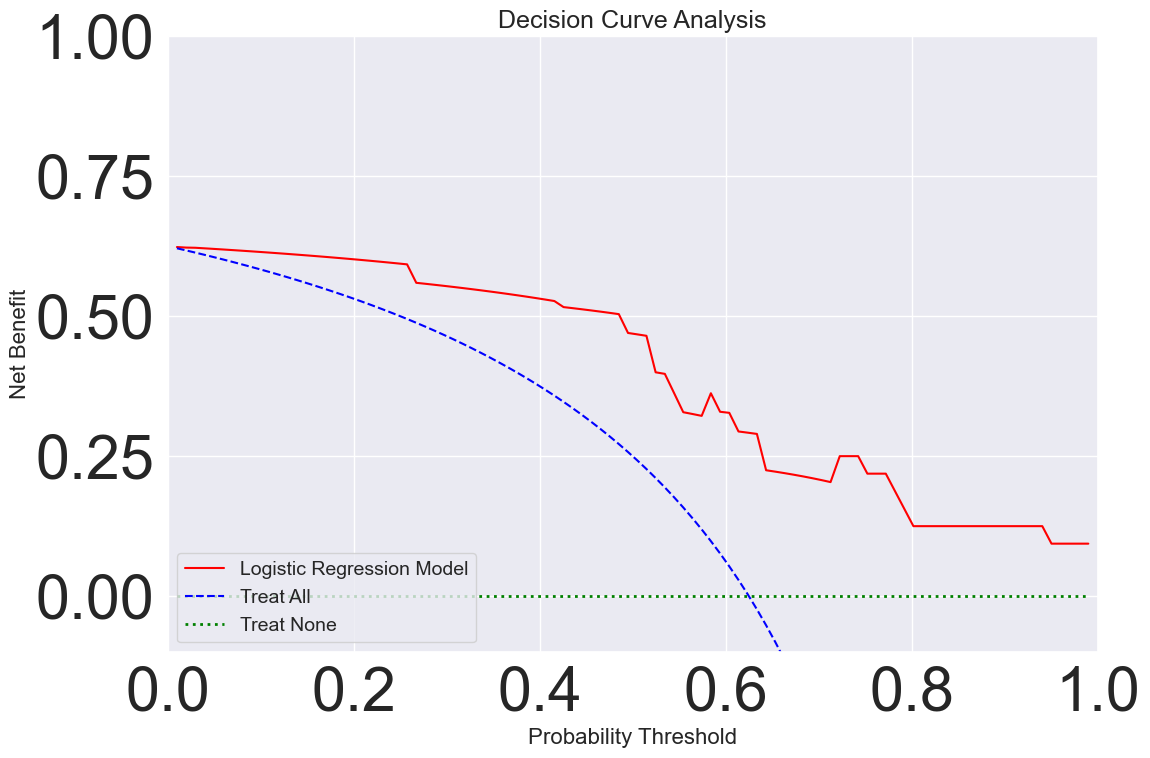

In [12]:
#LR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/train_dataset.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/test_dataset.csv')
# 2. 分离特征和标签
X_train = train_data.iloc[:, 2:] 
y_train = train_data['label']
X_test = test_data.iloc[:, 2:] 
y_test = test_data['label']

# 3. 初始化并训练逻辑回归模型
model = LogisticRegression(penalty="l2",solver="liblinear",C=1.0,max_iter=100)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('All feature-Logistic regression', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)


# import numpy as np
# import matplotlib.pyplot as plt

# # Function to calculate net benefit for the model
# def calculate_net_benefit(thresholds, y_true, y_proba):
#     net_benefits = []
#     for threshold in thresholds:
#         w = threshold / (1 - threshold)  # Weight of false positives vs true positives
#         predictions = y_proba >= threshold
#         tp = np.sum((predictions == 1) & (y_true == 1))
#         fp = np.sum((predictions == 1) & (y_true == 0))
#         net_benefit = tp - (fp * w)
#         net_benefits.append(net_benefit / len(y_true))  # Scale by the number of cases
#     return net_benefits

# # Calculate net benefit for "All" treated (variable benefit based on threshold)
# def net_benefit_all(thresholds, y_true):
#     prevalence = np.mean(y_true)
#     return [prevalence - (1 - prevalence) * threshold for threshold in thresholds]

# # Calculate net benefit for "None" treated (no cases are positive)
# def net_benefit_none(thresholds):
#     return [0 for _ in thresholds]

# # Range of thresholds from 0.01 to 0.99
# thresholds = np.linspace(0.01, 0.99, 100)

# # Calculate net benefits
# model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
# all_net_benefits = net_benefit_all(thresholds, y_test)
# none_net_benefits = net_benefit_none(thresholds)

# # Plot Decision Curve Analysis
# plt.figure(figsize=(12, 8))
# plt.plot(thresholds, model_net_benefits, label='Logistic Regression Model', color='red')
# plt.plot(thresholds, all_net_benefits, label='Treat All', linestyle='-', color='blue')
# plt.plot(thresholds, none_net_benefits, label='Treat None', linestyle='--', color='green')
# plt.xlabel('Probability Threshold', fontsize=16)
# plt.ylabel('Net Benefit', fontsize=16)
# plt.title('Decision Curve Analysis', fontsize=18)
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='LR', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()


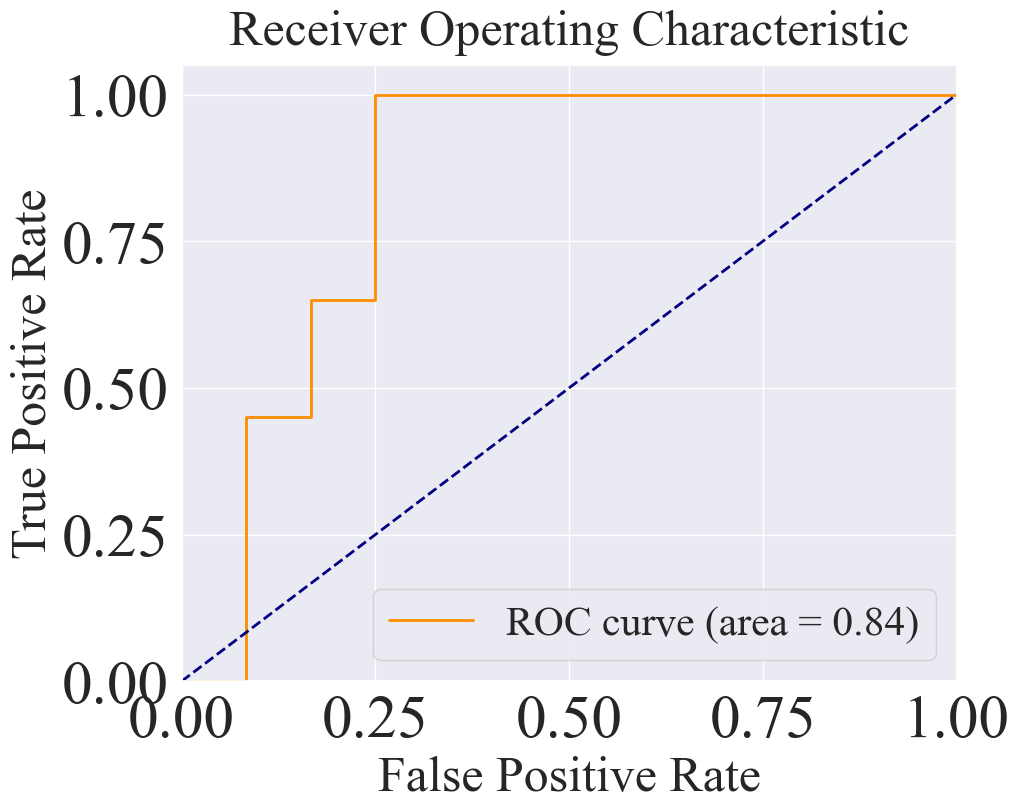

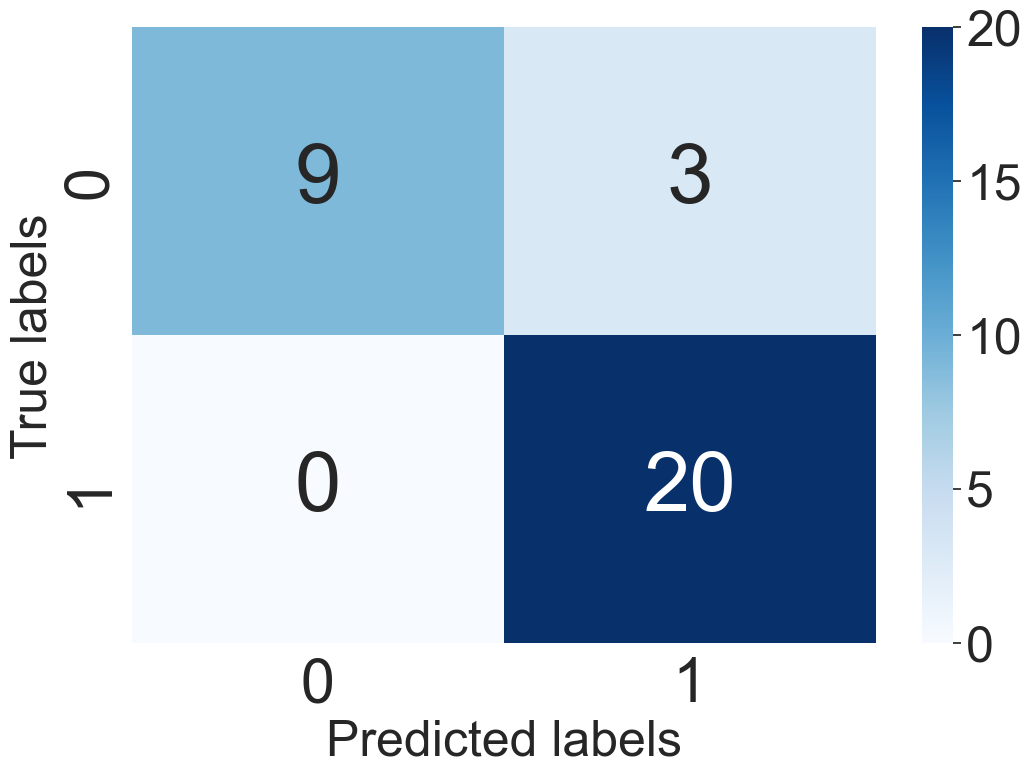

AUC Score: 0.8416666666666667
Sensitivity: 1.0
Accuracy: 0.90625
Confusion Matrix:
[[ 9  3]
 [ 0 20]]
Specificity: 0.75
Precision: 0.8695652173913043


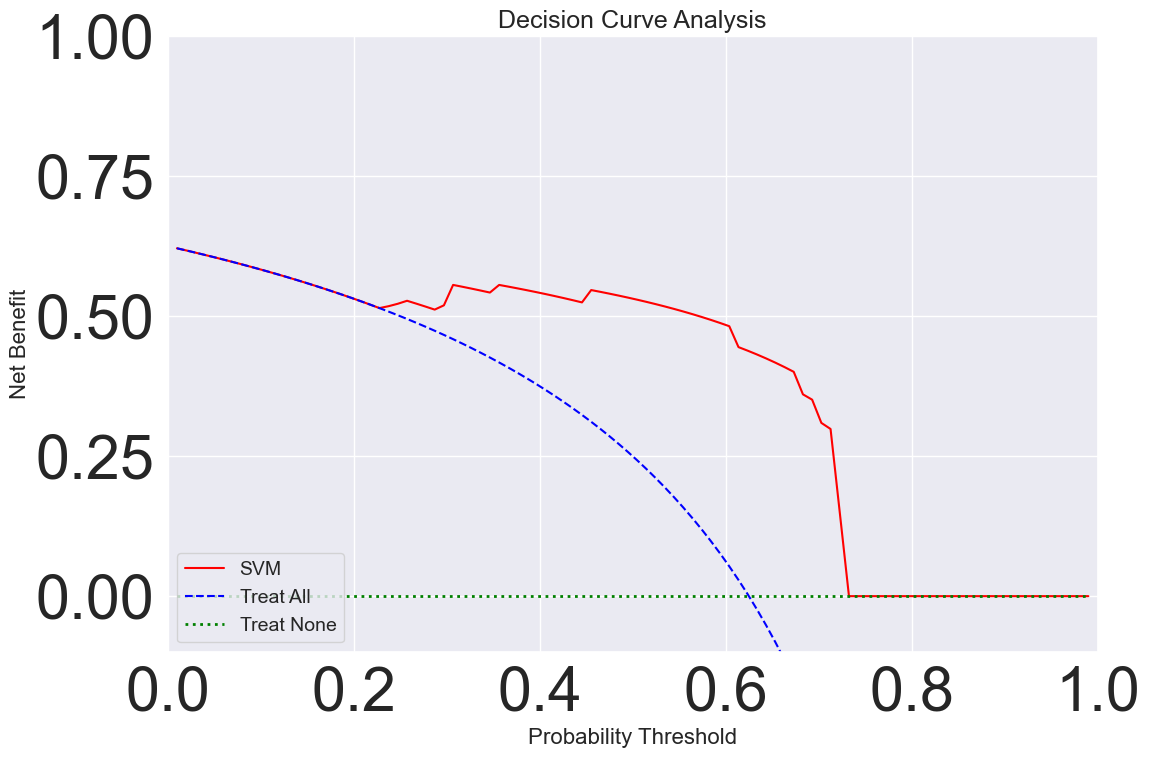

In [20]:
#svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/train_dataset.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/test_dataset.csv')
# 2. 分离特征和标签
X_train = train_data.iloc[:, 2:] 
y_train = train_data['label']
X_test = test_data.iloc[:, 2:] 
y_test = test_data['label']
# 3. 初始化并训练支持向量机模型
# model = SVC(probability=True)
model = SVC(kernel='rbf', C=1.0,probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('All feature-Support vector machine', fontsize=36, y=1.02)  # 调整标题位置
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='SVM', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()


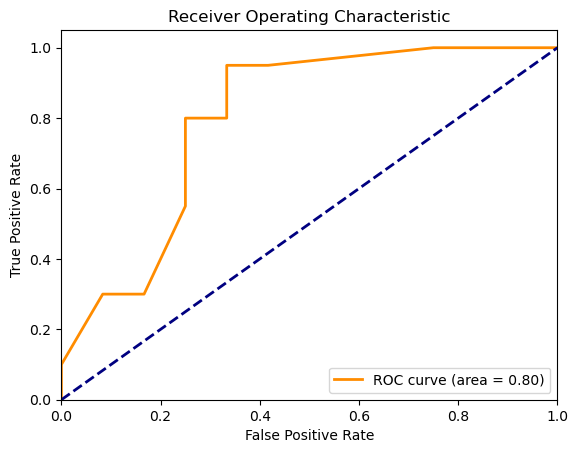

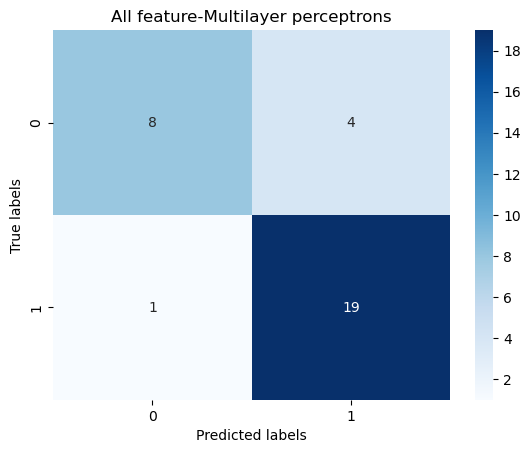

AUC Score: 0.7979166666666666
Sensitivity: 0.95
Accuracy: 0.84375
Confusion Matrix:
[[ 8  4]
 [ 1 19]]
Specificity: 0.6666666666666666
Precision: 0.8260869565217391


In [10]:
#mlp
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_train.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv2/lasso_selected_features_test.csv')

# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练MLP模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# 4. 使用测试集评估模型
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 6. 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('All feature-Multilayer perceptrons')
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)
